# Evaluación de Modelos


En este notebook veremos cómo implementar los pasos necesarios para una correcta evaluación de modelos. Las secciones del notebook son:
1. Comenzaremos con nuestro infaltable ejemplo con el dataset de Iris, implementando un `train_test_split` y, luego, optimización de hiperparámetros. A esta altura, ya debés estar cansado/a de este dataset. Pero si entiendes bien este ejemplo, el resto será más fácil.
2. En esta sección, debes aplicar lo aprendido en el dataset de Titanic.

## 1. Train-Test Split y Optimización de Hiperparámetros

### 1.1 Train-Test Split

1. Carga del dataset y separa en `X` e `y` como venimos haciendo.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
X = data.drop("target", axis=1)
# X = data[['petal length (cm)', 'petal width (cm)']]
y = data.target

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

Luego, como aprendimos, vamos a separar el dataset en conjuntos de entrenamiento `X_train, y_train` y de testeo `X_test,y_test` usando la función `train_test_split` de Scikit-Learn (¡recuerda mirar su documentación e importarla!). Esto lo hacemos para separar parte de los datos `X_test,y_test` con los cuales **no vamos a entrenar el modelo, sino que vamos a usarlos únicamente para evaluar su desempeño**.

2. Separa `X` e `y`, tomando en las variables `X_train, y_train` un 70% para entrenamiento y en las variables `X_test,y_test` un 30% para evaluación. Recuerda fijar el `random_state`.

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42) # Separe el 10 % de los datos para test

#X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.30, stratify=y, random_state=42)

3. Crea un modelo de vecino más cercanos y entrénalo sobre el conjunto de Train.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 5
clf_knn = KNeighborsClassifier(n_neighbors =n_neighbors )

In [8]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier()

4. Predice las etiquetas sobre el conjunto de Train y sobre el conjunto de Test.

In [9]:
y_train_pred = clf_knn.predict(X_train)
y_test_pred = clf_knn.predict(X_test)

5. Evalúa el desempeño del modelo usando la función `accuracy_score` y la matriz de confusión sobre ambos conjuntos (Train y Test).

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aciertos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aciertos sobre el set de evaluación:',test_acc)

Porcentaje de aciertos sobre el set de entrenamiento: 0.9629629629629629
Porcentaje de aciertos sobre el set de evaluación: 1.0


In [12]:
confusion_matrix(y_train, y_train_pred)

array([[45,  0,  0],
       [ 0, 42,  3],
       [ 0,  2, 43]], dtype=int64)

In [13]:
confusion_matrix(y_test, y_test_pred)

array([[5, 0, 0],
       [0, 5, 0],
       [0, 0, 5]], dtype=int64)

**Para Pensar**:

1. ¿Qué ocurre con el desempeño con número de vecinos igual a 1 y un número de vecinos grande (del orden del tamaño del dataset?
2. ¿Cuál será el número óptimo de vecinos para este modelo?¿Cómo podrías obtenerlo?


### 1.2 Encontrando el mejor hiperparámetro

Durante el entrenamiento, el modelo ajusta ciertas característica intrínsecas que llamamos parámetros. Por ejemplo, un árbol de decisión debe decidir automáticamente con qué umbrales comparar ciertos atributos en cada nodo. Pero los hiperparámetros son características que debemos definir nosotros; por ejemplo, la profundidad del árbol o el número de vecinos. Optimización de hiperparámetros se lleva un tiempo considerable en un flujo de ML, y si bien hay técnicas más o menos automáticas para hacerlo, al final siempre tiene algo artesanal. Además, está fuertemente ligado a la evaluación de nuestro modelo: siempre optimizamos hiperparámetros dada cierta métrica. Esta métrica se define en función del problema, nuestras necesidades y posibilidades.
 
La variación de hiperparámetros está asociada a la complejidad del modelo, al overfitting y al underfitting. Por ejemplo, en el caso de árboles de decisión, un árbol de profundidad 1 es mucho más sencillo que uno de profundidad 10. En el primer caso, el modelo tenderá a estar subajustado, mientras que en el segundo, sobreajustado. En esta sección vamos a empezar haciendo la optimización más sencilla posible, un sólo hiperparámetro. En este caso, una buena opción es probar con muchos valores del hiperparámetro, y graficar su desempeño en función de estos valores. De esta forma, variamos la complejidad del modelo y observámos como impacta en su desempeño. Estas curvas se llaman curvas de validación, y se pueden hacer automáticamente desde Scikit-Learn, pero primero las vamos a hacer *a mano* para entender bien su funcionamiento.

Vamos a ver esto en el caso de un modelo de vecinos más cercanos. Para ello, debemos evaluar la exactitud y del modelo en el set de train y test para distintos valores del parámetro `n_neighbors`. Vamos entonces a repetir el esquema de: **definir, entrenar y predecir** en un loop `for` que recorre una lista con distintos valores de vecinos.

**Ejercicio**: Trabaja en el siguiente bloque de codigo, de manera de completar con valores las listas `lista_accuracy_train` y `lista_accuracy_test`.

In [14]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

**Ejercicio**: Realiza un gráfico que muestre la curvas de accuracy en el set de entrenamiento (`lista_accuracy_train`) y accuracy en el set de testeo (`lista_accuracy_test`) en función del numero de vecinos (`k_vecinos`).

Text(0, 0.5, 'Exactitud')

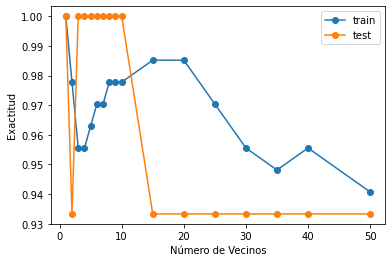

In [15]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

**Para pensar**: ¿cuál será el mejor hiperparámetro?¿En que región hay sobre-ajuste y en cuál sub-ajuste?

Te dejamos una celda que puedes correr para observar distintas fronteras de decisión obtenidas para distintos valores del número de vecinos. ¿Notas para qué número de vecinos y en qué región está sobreajustando?

<ipython-input-16-20b61621dcbe>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-16-20b61621dcbe>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-16-20b61621dcbe>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y,

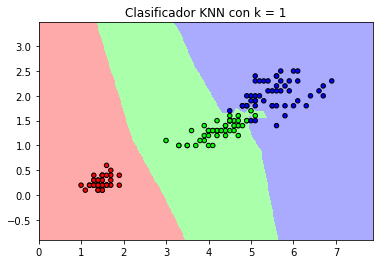

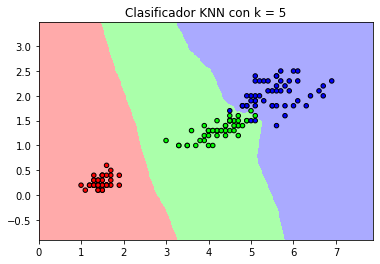

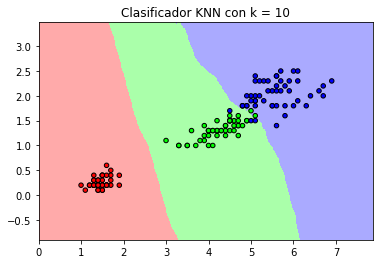

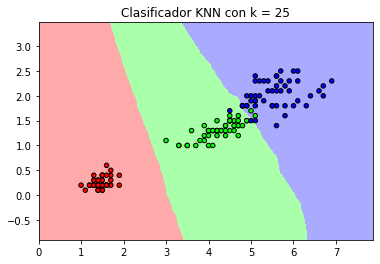

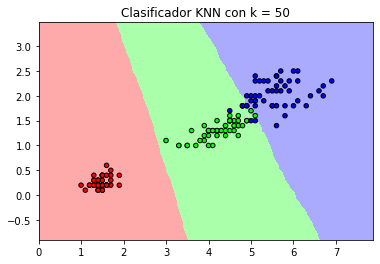

In [16]:
from matplotlib.colors import ListedColormap

X = data[['petal length (cm)', 'petal width (cm)']].values

y = data.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for k in [1,5,10,25,50]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador KNN con k = %i"% (k))

**Curvas de validacíon en Scikit-Learn**

Mencionamos que puedes hacer curvas de validación en Scikit-Learn; puedes encontrar su documentación [aquí](https://scikit-learn.org/stable/modules/learning_curve.html), pero utilizan algo que todavía no vimos, Validación Cruzada. Sin embargo, puedes mirar la documentación para ir familiarizándote.

**Ejercicio:** Repite entrenamiento, evaluación, optimización de hiperparámetro (profundidad) y visualización de fronteras para un`DecisionTreeClassifier`.

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(max_depth = 2, random_state=42)

In [18]:
clf_tree.fit(X_train,y_train)

y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [19]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print('Porcentaje de aceirtos sobre el set de entrenamiento:', train_acc)
print('Porcentaje de aceirtos sobre el set de evaluación:',test_acc)

Porcentaje de aceirtos sobre el set de entrenamiento: 0.9703703703703703
Porcentaje de aceirtos sobre el set de evaluación: 0.8666666666666667


In [20]:
confusion_matrix(y_train, y_train_pred)

array([[45,  0,  0],
       [ 0, 44,  1],
       [ 0,  3, 42]], dtype=int64)

In [21]:
confusion_matrix(y_test, y_test_pred)

array([[5, 0, 0],
       [0, 4, 1],
       [0, 1, 4]], dtype=int64)

In [22]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [23]:
lista_accuracy_test

[0.6666666666666666,
 0.8666666666666667,
 0.9333333333333333,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667]

Text(0, 0.5, 'Exactitud')

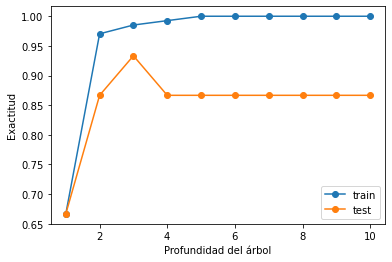

In [24]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

<ipython-input-25-f385127eb643>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-25-f385127eb643>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-25-f385127eb643>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y,

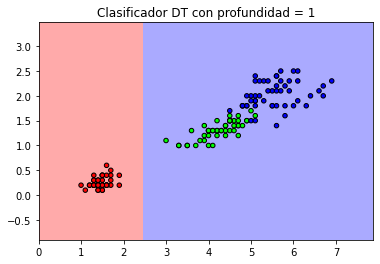

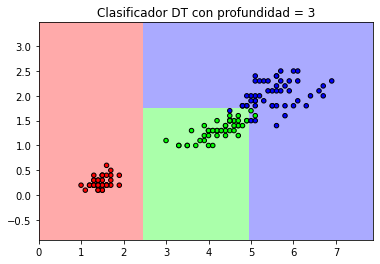

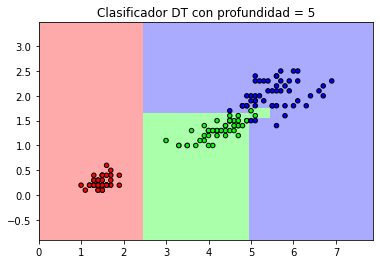

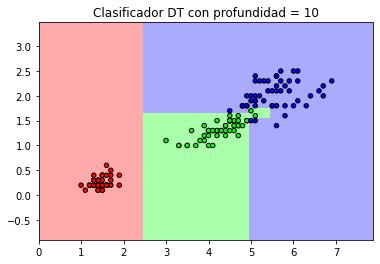

In [25]:
X = data[['petal length (cm)', 'petal width (cm)']].values
y = data.target
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for max_depth in [1,3,5,10]:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificador DT con profundidad = %i"% (max_depth))

### 2. Dataset Titanic

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en:

1. Generar dos casos benchmark para este dataset. ¿Cuáles se te ocurren? Hay una pista en el notebook anterior.
1. Encontrar los mejores parámetros para profundidad y número de vecinos para un modelo de árbol de decisión y kNN, respectivamente. No te olvides de agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. 
1. Evaluar precisión, exhaustividad y F-Score para los modelos con los mejores hiperparámetros. Existen varias funciones de Scikit-Learn que puedes usar. Puedes consultar la información [aquí](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). Es importante que leas **detalladamente** la documentación de la función que elijas.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Importamos el Dataset
df = pd.read_csv("ds_12_titanic.csv")
df.head(4)

FileNotFoundError: [Errno 2] No such file or directory: 'ds_12_titanic.csv'

In [ ]:
X = df.drop("Survived", axis=1)
y = df.Survived

**Casos Benchmark**

Predecimos que todos sobreviven

In [ ]:
y_pred = np.ones(y.size)
#y_pred

In [ ]:
accuracy_score(y, y_pred)

In [ ]:
confusion_matrix(y, y_pred)

Y que nadie sobrevive

In [ ]:
y_pred = np.zeros(y.size)

In [ ]:
accuracy_score(y, y_pred)

In [ ]:
confusion_matrix(y, y_pred)

**Entrenamiento del Modelo y evaluación**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

clf_tree = DecisionTreeClassifier()
clf_knn = KNeighborsClassifier()

**Optimización para vecinos más cercanos**

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [ ]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()

**Optimización para árboles**

In [ ]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

In [ ]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()

**Precisión, Exhaustividad y F-Score**

In [ ]:
clf_tree_best = DecisionTreeClassifier(max_depth = 8)
clf_knn_best = KNeighborsClassifier(n_neighbors=5)

clf_tree_best.fit(X_train, y_train)
clf_knn_best.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

**Para el modelo árbol**

In [ ]:
y_test_pred = clf_tree_best.predict(X_test)

precision_recall_fscore_support(y_test, y_test_pred, pos_label= 1)

**Para el modelo de vecinos**

In [ ]:
y_test_pred = clf_knn_best.predict(X_test)

precision_recall_fscore_support(y_test, y_test_pred, pos_label= 1)